In [13]:
from template_files import wholesale_customers

df = wholesale_customers.read_csv_2('data/wholesale_customers.csv')
df

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
...,...,...,...,...,...,...
435,29703,12051,16027,13135,182,2204
436,39228,1431,764,4510,93,2346
437,14531,15488,30243,437,14841,1867
438,10290,1981,2232,1038,168,2125


In [14]:
df_statistics = wholesale_customers.summary_statistics(df)
df_statistics

,mean,std,min,max
Fresh,12000,12647,3,112151
Milk,5796,7380,55,73498
Grocery,7951,9503,3,92780
Frozen,3072,4855,25,60869
Detergents_Paper,2881,4768,3,40827
Delicassen,1525,2820,3,47943


In [15]:
df_standardized = wholesale_customers.standardize(df)
df_standardized.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,440.000000
mean,-3.633457e-17,0.000000,-5.652044e-17,3.633457e-17,3.229740e-17,0.000000
std,1.000000e+00,1.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000
min,-9.486033e-01,-0.777910,-8.363823e-01,-6.276286e-01,-6.037292e-01,-0.539650
25%,-7.015353e-01,-0.577649,-6.101418e-01,-4.798844e-01,-5.505082e-01,-0.395950
50%,-2.764455e-01,-0.293923,-3.362856e-01,-3.184420e-01,-4.331074e-01,-0.198351
75%,3.900786e-01,0.188877,2.845866e-01,9.935132e-02,2.182338e-01,0.104741
max,7.918724e+00,9.173208,8.926367e+00,1.190545e+01,7.958613e+00,16.459711


In [16]:
df_standardized_statistics = wholesale_customers.summary_statistics(df_standardized)
df_standardized_statistics

,mean,std,min,max
Fresh,0,1,-0.948603,7.918724
Milk,0,1,-0.777910,9.173208
Grocery,0,1,-0.836382,8.926367
Frozen,0,1,-0.627629,11.905449
Detergents_Paper,0,1,-0.603729,7.958613
Delicassen,0,1,-0.539650,16.459711


In [17]:
km = wholesale_customers.kmeans(df_standardized, 3)
km

0      0
1      0
2      0
3      0
4      0
      ..
435    0
436    0
437    1
438    0
439    0
Length: 440, dtype: int32

In [18]:
kpp = wholesale_customers.kmeans_plus(df_standardized, 3)
kpp

0      0
1      0
2      0
3      0
4      0
      ..
435    0
436    0
437    1
438    0
439    0
Length: 440, dtype: int32

In [19]:
agg = wholesale_customers.agglomerative(df, 3)
agg

0      0
1      0
2      0
3      0
4      0
      ..
435    0
436    0
437    0
438    0
439    0
Length: 440, dtype: int64

In [20]:
km_result = wholesale_customers.clustering_score(df, km)
kmpp_result = wholesale_customers.clustering_score(df, kpp)
agg_result = wholesale_customers.clustering_score(df, agg)
print(f'K-means result {km_result}')
print(f'K-means++ result {kmpp_result}')
print(f'Agglomerative result {agg_result}')

K-means result 0.49664529276946184
K-means++ result 0.5143056154350935
Agglomerative result 0.7459932776249836


In [21]:
cluster_results = wholesale_customers.cluster_evaluation(df)
cluster_results

,Algorithm,data,k,Silhouette Score
0,Kmeans,Original,3,0.347912
1,Kmeans,Original,3,0.341061
2,Kmeans,Original,3,0.333917
3,Kmeans,Original,3,0.333917
4,Kmeans,Original,3,0.539126
...,...,...,...,...
61,Kmeans,Standardized,10,0.315311
62,Kmeans,Standardized,10,0.293993
63,Agglomerative,Standardized,3,0.796648
64,Agglomerative,Standardized,5,0.734538


In [22]:
wholesale_customers.best_clustering_score(cluster_results)

0.7966481845391108

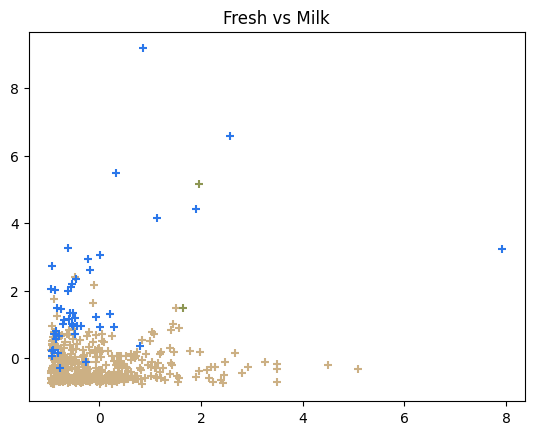

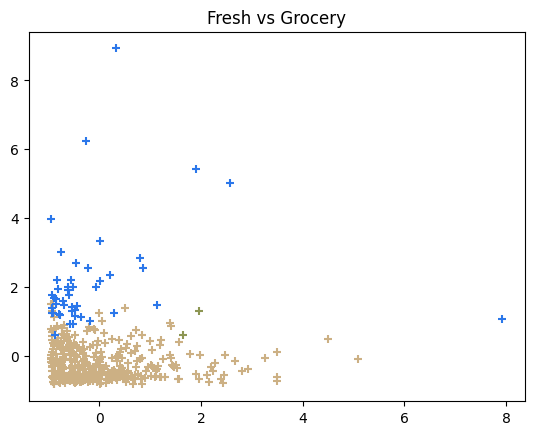

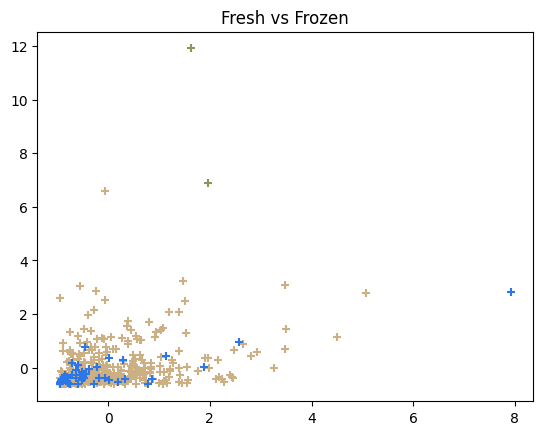

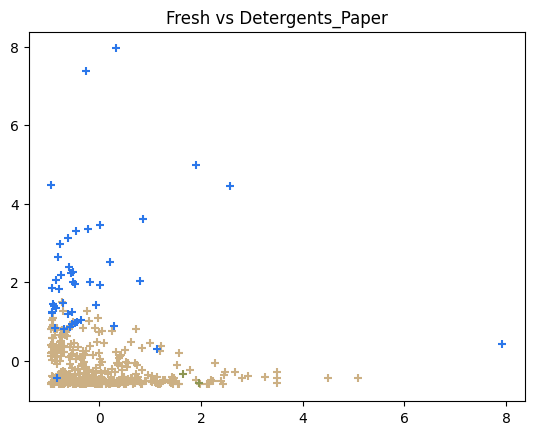

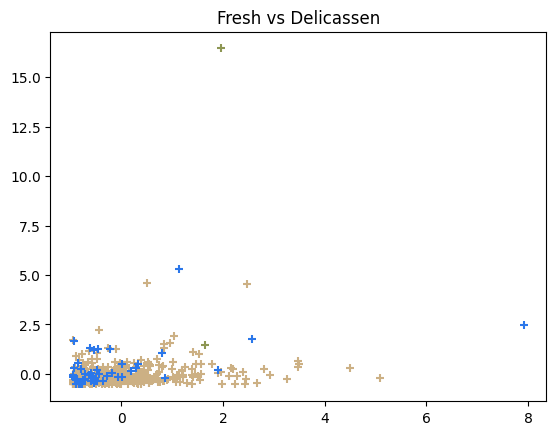

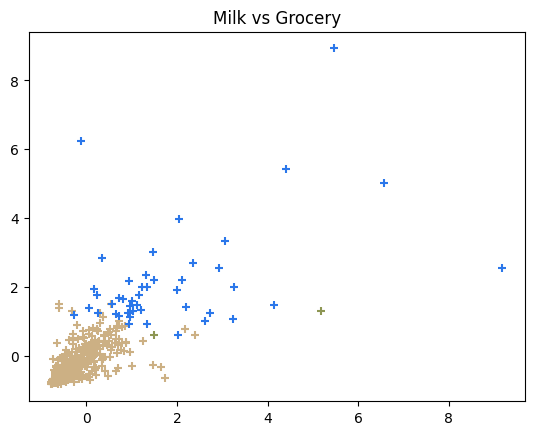

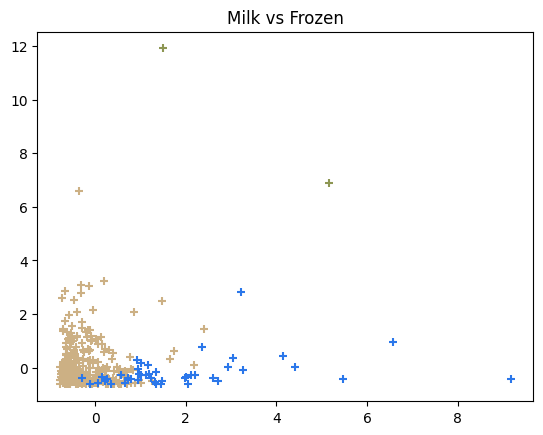

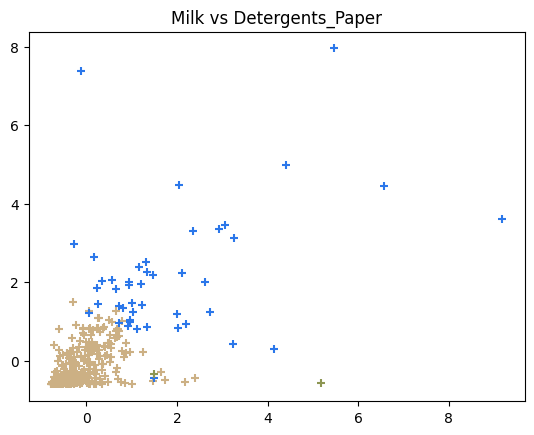

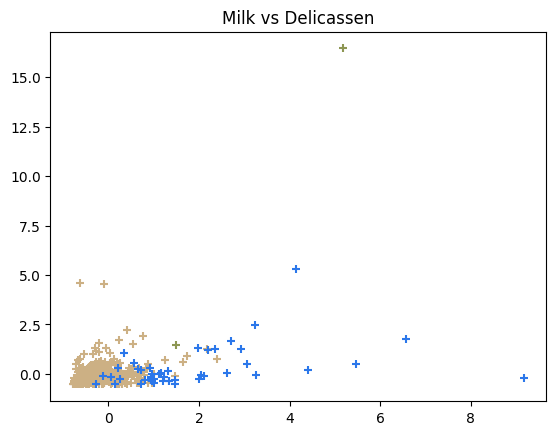

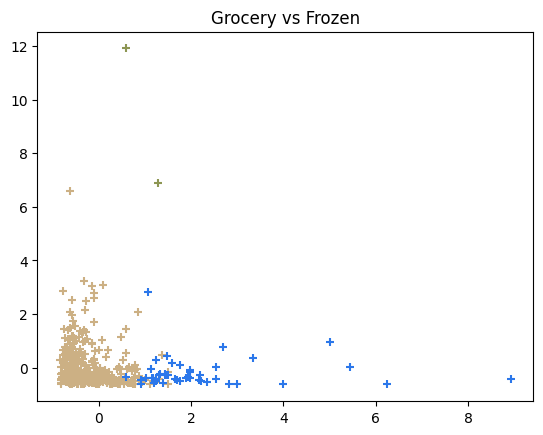

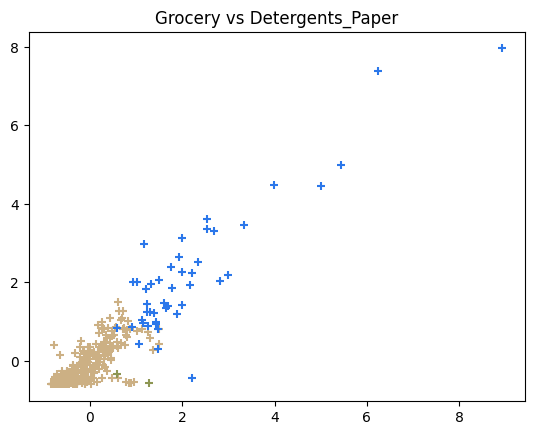

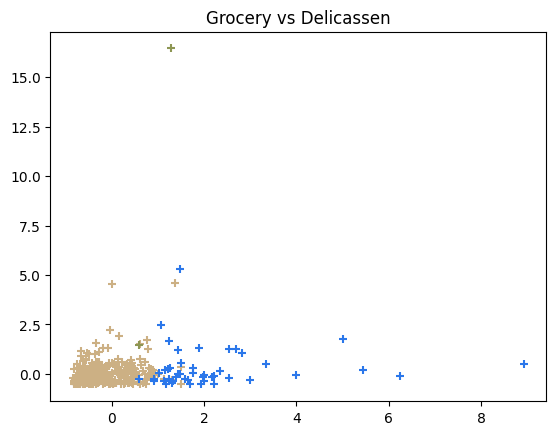

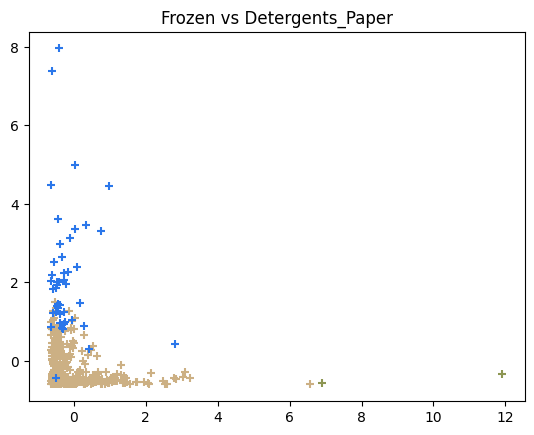

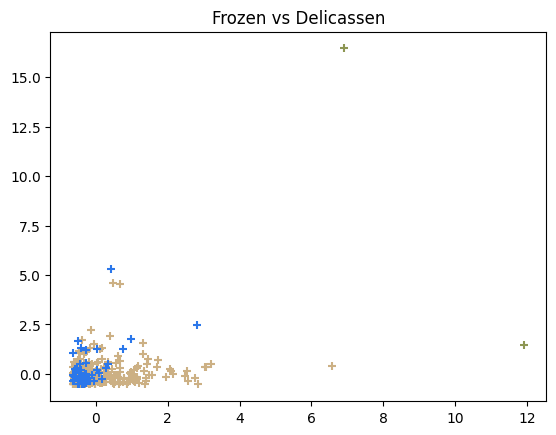

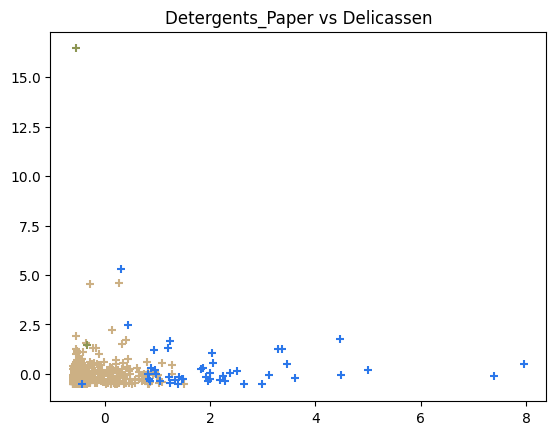

In [23]:
wholesale_customers.scatter_plots(df)